In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set custom color map.
cm = ['#116FA1', '#2DC0D2', '#E0B266', '#00979F', '#70CAC6', '#005A7D']
bg = '#F9F9F9'

In [60]:
df1 = pd.read_csv('../data/quarterly_updated.csv')
df1.index = pd.date_range('1947-04-01', '2015-12-31', freq='QE')
df1.drop(['Date'], axis=1, inplace=True)
print(df1.columns)
df1.columns = ['rcg_nds', 'lrgr1', 'lrgr2', 'lrgr3', 'lrgr4', 'lrgr5', 'lrgrm', 'lrgrf']

Index(['real_cons_growth_nondurable_services',
       'log of real gross return of P1 (growth)',
       'log of real gross return of P2', 'log of real gross return of P3',
       'log of real gross return of P4',
       'log of real gross return of P5 (value)',
       'log of real gross return of market',
       'log of real gross return of riskfree asset'],
      dtype='object')


In [140]:
# Question 1.

lrets = df1.loc[:, [f'lrgr{i}' for i in range(1, 6)]] # log of real growth return of 5 sorted portfolios log(1 + R)
rets = np.exp(lrets) # simple gross returns 1 + R
stddev = lrets.std()

log_return_1 = np.log(rets.mean())
log_return_2 = lrets.mean() + (stddev ** 2) / 2

diff = np.abs(log_return_1 - log_return_2)

print('log E[1 + R]')
print(log_return_1 * 100)
print()

print('E[r] + σ²')
print(log_return_2 * 100)
print()

print('Diff.')
print(diff * 100)
print()

eer = rets.values - np.exp(df1['lrgrf']).values.reshape(-1, 1)
eer = pd.DataFrame(eer, index=rets.index, columns=rets.columns)
eer = eer.mean() * 100

print('EER')
print(eer)

log E[1 + R]
lrgr1    1.988938
lrgr2    2.096809
lrgr3    2.337624
lrgr4    2.513479
lrgr5    2.946637
dtype: float64

E[r] + σ²
lrgr1    2.001687
lrgr2    2.104670
lrgr3    2.344569
lrgr4    2.519913
lrgr5    2.954235
dtype: float64

Diff.
lrgr1    0.012748
lrgr2    0.007861
lrgr3    0.006945
lrgr4    0.006435
lrgr5    0.007598
dtype: float64

EER
lrgr1    1.852738
lrgr2    1.962835
lrgr3    2.209049
lrgr4    2.389222
lrgr5    2.834369
dtype: float64


In [178]:
df1.lrgrm.std()

0.08249744083656263

In [179]:
eer = (log_return_2 - df1.lrgrf.mean()) * 100
eer['lrgrm'] = (df1.lrgrm + (df1.lrgrm.std() ** 2) / 2 - df1.lrgrf).mean()

In [181]:
# Question 2.

mkt_ret = df1.lrgrm
rf = df1.lrgrf
Δc = df1.rcg_nds

Cov = np.cov(mkt_ret, Δc)[0, 1]
γ = eer / Cov

print(γ)

lrgr1    22196.936570
lrgr2    23433.395813
lrgr3    26313.719976
lrgr4    28418.977900
lrgr5    33633.625538
lrgrm      232.867807
dtype: float64


In [182]:
# Question 3.

γm = []
γ1 = []
γ2 = []
γ3 = []
γ4 = []
γ5 = []

γm.append(γ.lrgrm)
γ1.append(γ.lrgr1)
γ2.append(γ.lrgr2)
γ3.append(γ.lrgr3)
γ4.append(γ.lrgr4)
γ5.append(γ.lrgr5)


for n in range(2, 17):
    Δc_n = Δc.rolling(n).sum().shift(-n).dropna()
    mkt_n = mkt_ret[:-n]
    Cov = np.cov(Δc_n, mkt_n)[0, 1]
    γ = eer / Cov
    print(f'{γ.lrgrm} | {γ.lrgr1} | {γ.lrgr2} | {γ.lrgr3} | {γ.lrgr4} | {γ.lrgr5}')
    γm.append(γ.lrgrm)
    γ1.append(γ.lrgr1)
    γ2.append(γ.lrgr2)
    γ3.append(γ.lrgr3)
    γ4.append(γ.lrgr4)
    γ5.append(γ.lrgr5)

103.77642760637634 | 9891.958935166203 | 10442.981100728186 | 11726.58382881247 | 12664.781983781177 | 14988.664836999567
81.18098056055862 | 7738.16313149163 | 8169.210149997553 | 9173.331514738844 | 9907.253927922651 | 11725.15316654075
58.67869633622462 | 5593.247598854106 | 5904.814137357247 | 6630.606462597968 | 7161.095379092838 | 8475.097213711615
56.76195604565748 | 5410.54410172097 | 5711.933315661213 | 6414.017626252084 | 6927.178116189575 | 8198.258065770866
52.64084644511161 | 5017.720337440476 | 5297.22767715371 | 5948.338297013393 | 6424.24160328369 | 7603.036858182026
50.66856214154919 | 4829.7223904181255 | 5098.757483272227 | 5725.473068816284 | 6183.545798939805 | 7318.175362452953
56.505028580784234 | 5386.053800884229 | 5686.078805905816 | 6384.985200254648 | 6895.8229192212675 | 8161.149449226346
58.55232634779188 | 5581.20202390952 | 5892.097575115311 | 6616.326839595109 | 7145.673299245726 | 8456.845309635111
57.44328841981303 | 5475.4886370243985 | 5780.49552454

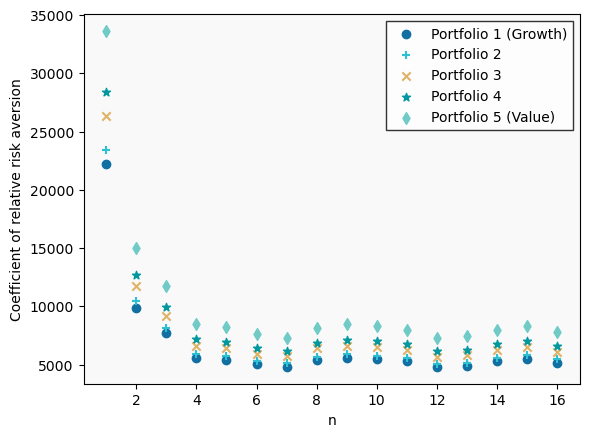

In [183]:
fig, ax = plt.subplots()

ax.scatter(np.arange(1, 17), γ1, label='Portfolio 1 (Growth)', color=cm[0], marker='o')
ax.scatter(np.arange(1, 17), γ2, label='Portfolio 2', color=cm[1], marker='+')
ax.scatter(np.arange(1, 17), γ3, label='Portfolio 3', color=cm[2], marker='x')
ax.scatter(np.arange(1, 17), γ4, label='Portfolio 4', color=cm[3], marker='*')
ax.scatter(np.arange(1, 17), γ5, label='Portfolio 5 (Value)', color=cm[4], marker='d')

ax.legend(fancybox=False, edgecolor='k')
ax.set_facecolor(bg)
ax.set_xlabel('n')
ax.set_ylabel('Coefficient of relative risk aversion')

plt.show()

In [185]:
# Question 4.

covm = []
cov1 = []
cov2 = []
cov3 = []
cov4 = []
cov5 = []

eerm = []
eer1 = []
eer2 = []
eer3 = []
eer4 = []
eer5 = []

COVs = [covm, cov1, cov2, cov3, cov4, cov5]
EERs = [eerm, eer1, eer2, eer3, eer4, eer5]
returns = [df1.lrgrm, lrets.lrgr1, lrets.lrgr2, lrets.lrgr3, lrets.lrgr4, lrets.lrgr5]
gammas = [γm, γ1, γ2, γ3, γ4, γ5]

for i in range(6):
    for n in range(1, 17):
        if n == 1:
            Cov = np.cov(Δc, returns[i])[0, 1]
            eer = gammas[i][0] * Cov
            COVs[i].append(Cov)
            EERs[i].append(eer)
            continue

        Δc_n = Δc.rolling(n).sum().shift(-n).dropna()
        ret_n = returns[i][:-n]
        Cov = np.cov(Δc_n, ret_n)[0, 1]
        eer = gammas[i][n - 1] * Cov
        COVs[i].append(Cov)
        EERs[i].append(eer)

In [191]:
eer = (log_return_2 - df1.lrgrf.mean()) * 100
eer['lrgrm'] = (df1.lrgrm + (df1.lrgrm.std() ** 2) / 2 - df1.lrgrf).mean()

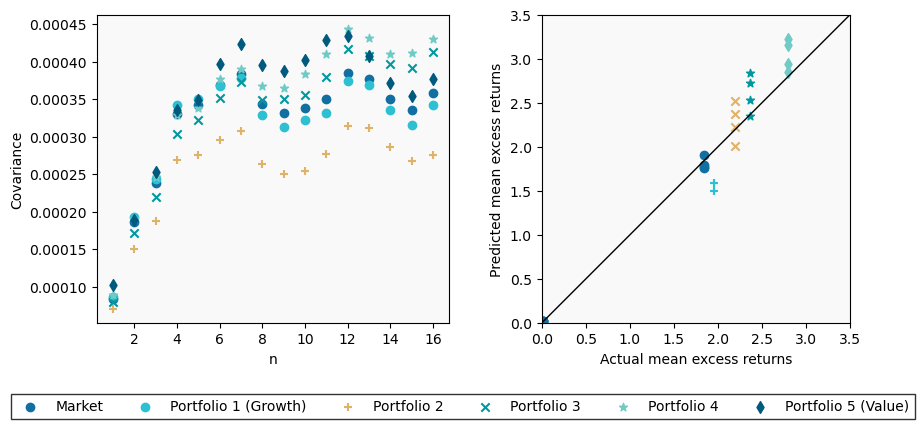

In [227]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))


# LEFT PANEL

ax1.scatter(range(1, 17), COVs[0], color=cm[0], marker='o')
ax1.scatter(range(1, 17), COVs[1], color=cm[1], marker='o')
ax1.scatter(range(1, 17), COVs[2], color=cm[2], marker='+')
ax1.scatter(range(1, 17), COVs[3], color=cm[3], marker='x')
ax1.scatter(range(1, 17), COVs[4], color=cm[4], marker='*')
ax1.scatter(range(1, 17), COVs[5], color=cm[5], marker='d')

ax1.set_facecolor(bg)
ax1.set_xticks(range(2, 17, 2))
ax1.set_xlabel('n')
ax1.set_ylabel('Covariance')


# RIGHT PANEL
ax2.plot(np.linspace(0, 3.5, 100), np.linspace(0, 3.5, 100), color='k', lw=1)

ax2.scatter([eer.lrgrm] * 4, (eerm[3], eerm[7], eerm[11], eerm[15]), color=cm[0], marker='o')
ax2.scatter([eer.lrgr1] * 4, (eer1[3], eer1[7], eer1[11], eer1[15]), color=cm[0], marker='o')
ax2.scatter([eer.lrgr2] * 4, (eer2[3], eer2[7], eer2[11], eer2[15]), color=cm[1], marker='+')
ax2.scatter([eer.lrgr3] * 4, (eer3[3], eer3[7], eer3[11], eer3[15]), color=cm[2], marker='x')
ax2.scatter([eer.lrgr4] * 4, (eer4[3], eer4[7], eer4[11], eer4[15]), color=cm[3], marker='*')
ax2.scatter([eer.lrgr5] * 4, (eer5[3], eer5[7], eer5[11], eer5[15]), color=cm[4], marker='d')

ax2.set_box_aspect(1)
ax2.set_facecolor(bg)
ax2.set_xmargin(0)
ax2.set_ylim(0, 3.5)
ax2.set_xlabel('Actual mean excess returns')
ax2.set_ylabel('Predicted mean excess returns')

fig.legend(['Market', 'Portfolio 1 (Growth)', 'Portfolio 2', 'Portfolio 3', 'Portfolio 4', 'Portfolio 5 (Value)'],
           fancybox=False,
           edgecolor='k',
           ncols=6,
           bbox_to_anchor=(0.95, -0.05))

plt.show()